In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
Q = pd.read_csv('Q_input.csv')
day = pd.read_csv('day_input.csv')

In [3]:
Q.head()

,X1,X2,X3,Y
0,1.332301,-0.196357,-0.066016,0.673732
1,1.084299,0.128180,0.233074,0.739938
2,1.105696,-0.135303,0.307625,0.732555
3,1.087559,-0.210563,0.044567,0.762086
4,1.053730,-0.216244,0.303153,0.710646


In [4]:
day.head()

,X1,X2,Y
0,-0.466170,-0.080405,0.503771
1,-0.467064,-0.082449,0.516934
2,-0.470949,-0.083336,0.520636
3,-0.468429,-0.078797,0.528863
4,-0.477765,-0.096502,0.525847


In [5]:
Q.describe()

,X1,X2,X3,Y
count,2.900000e+01,2.900000e+01,2.900000e+01,29.000000
mean,3.828355e-17,7.656711e-18,6.891039e-17,0.560125
std,7.602736e-01,4.340054e-01,3.160350e-01,0.216507
min,-1.142063e+00,-6.712384e-01,-5.714060e-01,0.000000
25%,-6.535401e-01,-2.499714e-01,-1.849759e-01,0.452727
50%,-7.456377e-02,-1.353030e-01,-1.061152e-02,0.523696
75%,6.632554e-01,2.976473e-01,2.260876e-01,0.710646
max,1.332301e+00,8.460372e-01,9.449197e-01,1.000000


In [6]:
Q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      29 non-null     float64
 1   X2      29 non-null     float64
 2   X3      29 non-null     float64
 3   Y       29 non-null     float64
dtypes: float64(4)
memory usage: 1.0 KB


In [7]:
day.describe()

,X1,X2,Y
count,2.870000e+03,2.870000e+03,2870.000000
mean,2.531076e-16,-3.771664e-18,0.637104
std,2.863727e-01,1.343847e-01,0.203716
min,-4.942610e-01,-2.805560e-01,0.000000
25%,-2.638494e-01,-1.031661e-01,0.548677
50%,6.283582e-02,6.888857e-03,0.689154
75%,1.544007e-01,8.591240e-02,0.767997
max,6.577351e-01,6.021176e-01,1.000000


In [8]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2870 non-null   float64
 1   X2      2870 non-null   float64
 2   Y       2870 non-null   float64
dtypes: float64(3)
memory usage: 67.4 KB


In [9]:
X = day.iloc[:,:-1]
Y = day.iloc[:,-1:]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.1, random_state=10)

In [11]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Activation
import matplotlib.pyplot as plt

In [12]:
X_train.shape

(2583, 2)

In [13]:
X_test.shape

(287, 2)

In [14]:
y_train.shape

(2583, 1)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.1, random_state=10)

In [16]:
X_val.shape

(259, 2)

In [17]:
X_train.shape

(2324, 2)

In [18]:
# 파라미터 설정
learning_rate = 0.01
training_cnt = 200
batch_size = 32
input_size = 2

# 모델 구조 설정
model = Sequential()
#activation [ tahn, sigmoid, relu etc.]
model.add(Dense(input_size, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(Dense(input_size * 3, activation='tanh'))
model.add(Dense(1, activation='tanh'))

#activation [ sgd, rmsprop, adam etc.]
model.compile(optimizer='sgd', loss='mse', metrics=['mae', 'mape','acc']) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X_train, y_train, epochs=training_cnt, batch_size=batch_size, verbose=1)
val_mse, val_mae, val_mape, val_acc = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/200
73/73 [==============================] - 2s 3ms/step - loss: 0.0838 - mae: 0.2381 - mape: 13132.6846 - acc: 8.6059e-04
Epoch 2/200
73/73 [==============================] - 0s 3ms/step - loss: 0.0267 - mae: 0.1373 - mape: 131908.8906 - acc: 8.6059e-04
Epoch 3/200
73/73 [==============================] - 0s 3ms/step - loss: 0.0253 - mae: 0.1317 - mape: 127276.5156 - acc: 8.6059e-04
Epoch 4/200
73/73 [==============================] - 0s 3ms/step - loss: 0.0244 - mae: 0.1295 - mape: 116864.5234 - acc: 8.6059e-04
Epoch 5/200
73/73 [==============================] - 0s 4ms/step - loss: 0.0236 - mae: 0.1274 - mape: 119230.5156 - acc: 8.6059e-04
Epoch 6/200
73/73 [==============================] - 0s 3ms/step - loss: 0.0230 - mae: 0.1261 - mape: 109098.8672 - acc: 8.6059e-04
Epoch 7/200
73/73 [==============================] - 0s 3ms/step - loss: 0.0225 - mae: 0.1246 - mape: 100993.6953 - acc: 8.6059e-04
Epoch 8/200
73/73 [==============================] - 0s 3ms/step - loss: 0.02

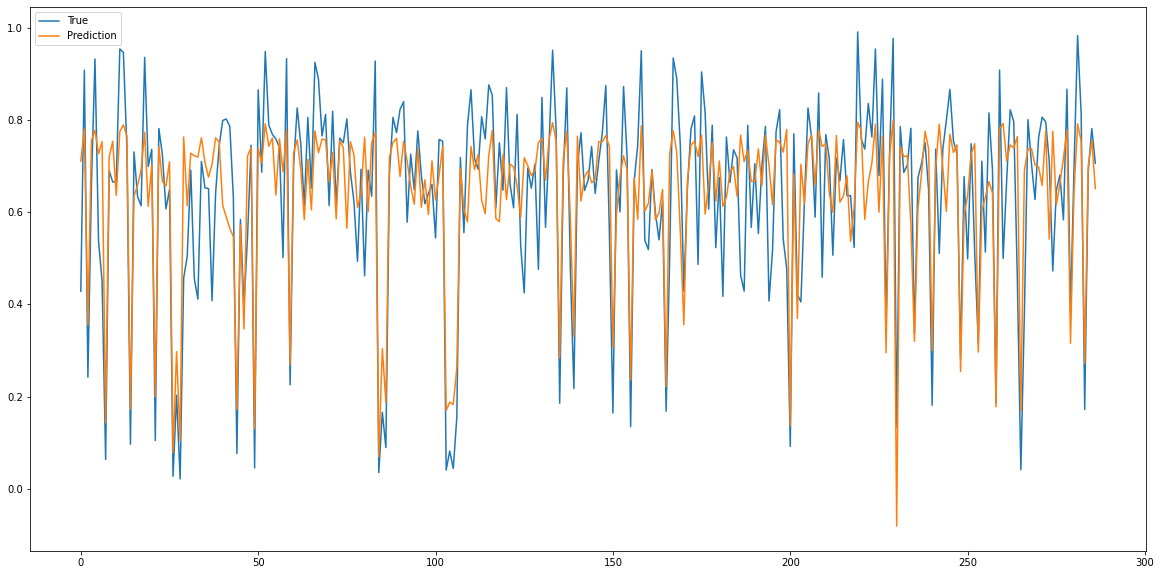

In [50]:
pred = model.predict(X_test)
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test.reset_index().Y, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [45]:
y_test.reset_index().Y

,Y
148,0.428767
1058,0.908405
2602,0.242013
470,0.661868
1156,0.932949
...,...
762,0.813794
2582,0.171946
2324,0.689840
778,0.781709


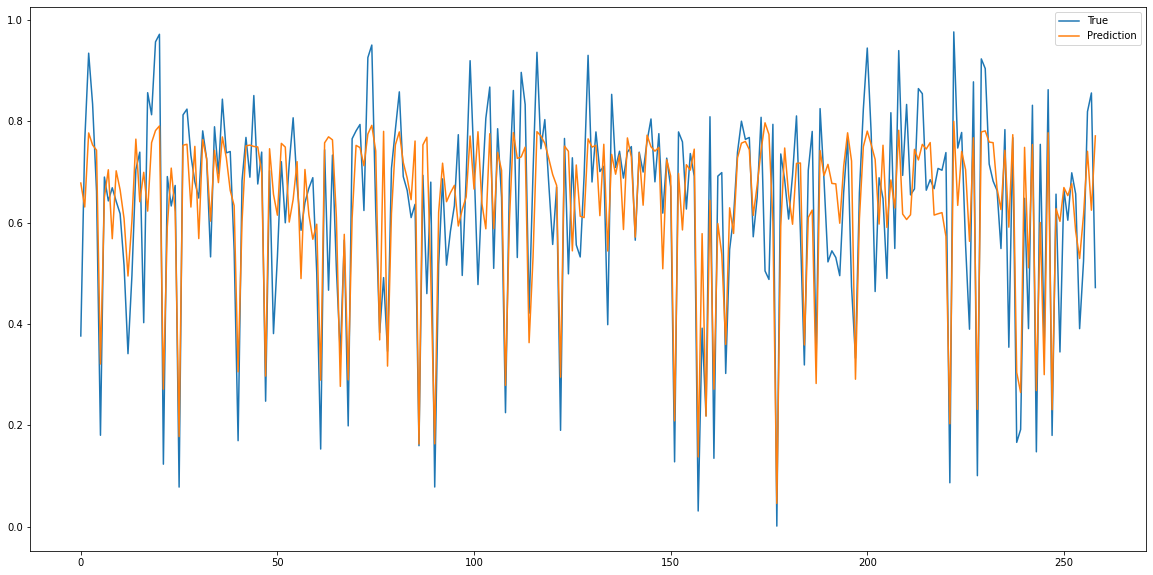

In [48]:
pred = model.predict(X_val)
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_val.reset_index().Y, label='val')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [47]:
# reset_index 해야 함 !! 
y_test.reset_index().Y

0      0.428767
1      0.908405
2      0.242013
3      0.661868
4      0.932949
         ...   
282    0.813794
283    0.171946
284    0.689840
285    0.781709
286    0.706294
Name: Y, Length: 287, dtype: float64

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(pred, y_test))
print(r2_score(pred,y_test))


0.015847906931708997
0.45489003117314897


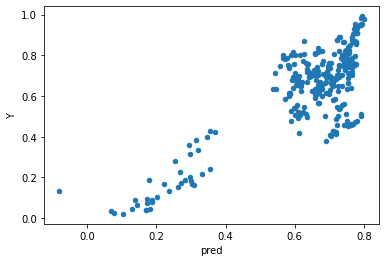

In [52]:
p = pd.DataFrame(pred)
p['Y'] = y_test.reset_index().Y
p.columns =['pred', 'Y']
p.plot.scatter(x = 'pred', y = 'Y')